In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.linear_model import LinearRegression # linear regression model
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.metrics import r2_score


data = pd.read_csv('tempDemand.csv')
data = data.dropna()


KeyboardInterrupt: 

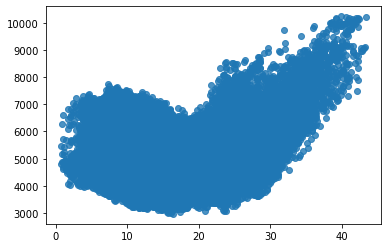

In [3]:
sns.regplot(data=data, x='Temperature', y='TOTALDEMAND')


In [17]:
X = data[['Temperature']]
Y = data['TOTALDEMAND']

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #'test_size' = value for size of training data

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model
training_score = linear.score(X_train,Y_train) # calculate rsq for the training set

# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 

# calculate the correlation of the predicted and actual target variables
rsquared_linear = r2_score(Y_test,preds_linear) #test score

# print the training and testing scores
print("Intercept is",np.round(linear.intercept_,2))
print("Coefficients are",np.round(linear.coef_, 2))
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))

Intercept is 4665.57
Coefficients are [25.6]
Training score is 0.027
Testing score is 0.025


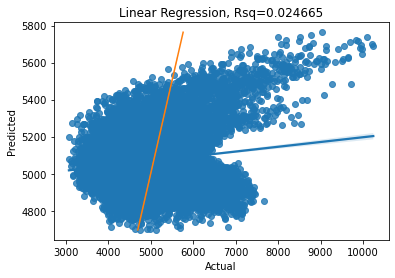

In [18]:
sns.regplot(x=Y_test, y=preds_linear);
sns.lineplot(x=preds_linear, y=preds_linear);
# add a title including the correlation coefficient
plt.title("Linear Regression, Rsq=%f" % rsquared_linear)
plt.ylabel("Predicted") # xlabel
plt.xlabel("Actual"); # ylabel